# Проверка гипотезы о равенстве долей

In [2]:
from scipy import stats as st
import numpy as np
import math as mth

alpha = .05 # критический уровень статистической значимости

successes = np.array([78, 120])
trials = np.array([830, 909])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 


# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля. Какова вероятность получить такое отличие или больше? Так как распределение статистики нормальное, вызовем метод cdf(). Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:

In [3]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.012621025223628068
Отвергаем нулевую гипотезу: между долями есть значимая разница


Такая разница в пропорциях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии. Хотя на первый взгляд, различие 9% и 13% кажется небольшим.

**задача**

400 пользователям из аудитории в 900 лидов — тех, кто проявил первичный интерес к продукту, — сделали спецпредложение о дополнении пакета услуг расширенными опциями. Остальным 500 пользователям пакет был предложен в оригинальном виде.

В обеих группах пакет заказали по 100 человек.

Сработало ли спецпредложение? Проверьте гипотезу о равенстве пропорций заказов в этих двух сегментах лидов.

In [4]:
from scipy import stats as st
import numpy as np
import math as mth

alpha = 0.05  # критический уровень статистической значимости

purchases = np.array([100, 100])
leads = np.array([400, 500])
#пропорция успехов в первой группе
p1 = purchases[0] / leads[0]  # ваш код
#пропорция успехов во второй группе
p2 = purchases[1] / leads[1]

#пропорция успехов в комбинированном датасете
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
#разница пропорций в датасетах
difference = p1 -p2

#считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined*(1-p_combined) * (1 / leads[0] + 1 / leads[1])) 
#задаем стандартное нормальное распределение(среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 
p_value = (1- distr.cdf(abs(z_value ))) * 2

print('p-значение: ', p_value)

if p_value < alpha: 
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.07299804543011557
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


# Проверка данных на нормальность. Критерий Шапиро-Уилка

Хи-квадрат — распространённый критерий, однако для проверки распределения на нормальность лучше применить другой — критерий Шапиро-Уилка. Его плюс в том, что при фиксированном уровне значимости он обладает бóльшей мощностью, чем хи-квадрат: чаще обнаруживает различия между распределениями, если они и правда есть. Устройство этого критерия ощутимо сложнее, а его более высокую мощность проще проверить на множестве датасетов, чем доказать теоретически. Расчёт критерия Шапиро-Уилка встроен в стандартную библиотеку scipy.stats.

В sample_1 сохранены данные о еженедельном количестве пользовательских сессий на сайте за год. Проверим методом st.shapiro(x), можно ли считать эту переменную нормально распределённой: 

In [6]:
from scipy import stats as st

sample_1 = [147370, 152806, 154268, 154570, 156869, 161300, 158908, 154499, 159760,
 154816, 150199, 150335, 152049, 150695, 156405, 158196, 163000, 155060,
 159906, 161635, 152265, 154191, 166409, 162048, 158006, 148260, 156046,
 149568, 153400, 157149, 151341, 155922, 148805, 157365, 159185, 159029,
 150370, 156801, 156520, 147587, 159004, 152702, 164429, 156915, 156685,
 158466, 149675, 161078, 142363, 153381, 154160, 157294, 149151, 152023,
 159271, 156266, 153598, 158988, 159654, 154394, 160494, 148227, 150683,
 160808, 162206, 154984, 152100, 153962, 158697, 167535, 149024, 153556,
 156801, 159323, 153131, 157763, 161555, 151529, 144765, 163783, 149504,
 151832, 160111, 153063, 162105, 151281, 152290, 156456, 155966, 148541,
 157985, 155979, 161416, 158958, 154449, 157113, 157141, 156666, 162254,
 158927]

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально')

p-значение:  0.9630048828466947
Не получилось отвергнуть нулевую гипотезу, распределение нормально


В sales_data сохранена выборка чеков интернет-магазина с точностью до рубля. Проверьте, нормально ли распределены суммы этих чеков. Примените критерий Шапиро-Уилка.

In [9]:
from scipy import stats as st

sales_data = [324,  209,  217,  321,  210,  231,  235,  519,  210,  240,  213,  325,
  252,  251,  246,  353,  260,  256,  203,  212,  211,  318,  529,  252,
  227,  278,  221,  222,  257,  289,  208,  256,  308,  395,  485,  350,
  214,  378,  218,  261,  216,  289,  533,  239,  326,  445,  210,  284,
  317,  260,  420,  497,  321,  205,  237,  261,  205,  269,  246,  685,
  246,  207,  317,  236,  519,  230,  208,  202,  216,  234,  242,  200,
  226,  213,  440, 1026,  318,  286,  210,  216,  227,  256,  221,  216,
  204,  498,  223,  287,  296,  292,  406,  213,  210,  291,  217,  200,
  344,  296,  222,  258,  223,  422,  497,  325,  328,  201,  242,  255,
  203,  252,  254,  221,  527,  231,  506,  203,  261,  678,  209,  261,
  281,  210,  292,  354,  210,  235,  220,  204,  270,  218,  230,  295,
  215,  372,  218,  230,  282,  284,  229,  210,  206,  267,  299,  263,
  563,  215,  258,  214,  351,  201]

alpha = 0.05 # критический уровень статистической значимости
results = st.shapiro(sales_data) #  методом  st.shapiro(x)проверим можно ли считать эту переменную нормально распределенной
p_value = results[1] # второе значение в массиве результатов(с индексом 1) это p-value'

print('p-значение: ', p_value)
if p_value < alpha: 
   print('Отвергаем нулевую гипотезу: распределение не нормально')  
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально')

p-значение:  2.36025464568174e-16
Отвергаем нулевую гипотезу: распределение не нормально


# Непараметрический тест Уилкоксона-Манна-Уитни
вы изучили алгебраические критерии, проверяющие предположение о нормальности распределения исходных данных. Их называют параметрическими, так как по выборке оценивают параметры предполагаемого распределения: среднее значение, например. Теперь — когда известно, что для некоторых переменных это предположение не выполняется — рассмотрим тест, основанный на структурном подходе, или непараметрический.

В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо.

Например, у вас есть общее число личных сообщений, которые пользователи писали друг другу на сайте в течение дня, до (messages_old) и после (messages_new) введения обновлённого интерфейса для переписки. 
Как обычно, связанная с измеряемой социальной активностью величина распределена ненормально: отдельные пользователи посылают громадное количество сообщений. Это выбросы.
Проверим, сказалось ли введение нового интерфейса на количестве отправляемых сообщений: 

In [10]:
from scipy import stats as st

messages_old = [81,  125,  131,  113,   85,  133,   96,  160,   80,   91,  106,   83,
   86,   82,  104,  578,  100,  108,  252,  128,   93,  370,  336,  201,
   82,  113,  151,   94,  111,  102,  115,  585,   88,   90,  221,  203,
   88,  127,   95,  189,   98,   89,   84,  153,   89,  122,   85,  172,
  116,  182,  100,   82,  130,  108,   83,  172,  172,  136,  249,  176,
   87,  357,  130,  131,  174,  148,  124,   81,   98,  113, 1245,   85,
  165,   83,  277,  170,  176,   95,   88,  212,  140,  146,  106,  100,
   89,  151,  165,  125,   91,   84,  225,  120,  168,  688,  135,  112,
  113,  109,  285,   96,  120,   93,   86,  236,  129,  114,   95,   87,
  111,   98,  106,  205,  435,  115,   87,  213,  499,  124,  132,   93,
   86,   90,  118,   87,   91,  188,   96,   85,   85,  101,   94,  908,
  132,  121,   82,  152,   87,   83,   97,  149,   87,  281,  169,  131,
  140,  102,  154,  857,  190,   89]
messages_new = [99, 102, 100,  84, 194,  84,  85,  86, 282,  96, 140,  82, 104,  81,
 397, 100,  95, 111,  89, 199,  83, 219, 122, 227, 165, 189, 208, 212,
  82, 147,  83,  89, 203, 188, 330,  90, 106, 121, 110, 109,  87, 205,
  96,  95, 158, 308,  95, 249, 176, 158, 111, 115,  93, 163, 139, 108,
  99, 239, 108, 104, 239, 120, 331, 175,  87, 204, 143,  89, 261, 118,
 104, 157, 207, 140, 119,  96,  95, 107, 216, 253, 171,  81,  97,  83,
 158, 103, 144, 144, 207,  94, 104,  92, 127,  93, 135, 232,  91, 122,
  98, 137,  89, 104, 179,  82,  99, 125, 142,  98, 101,  92, 124, 265,
 451, 134,  98,  82, 110, 177,  96, 130, 109, 102, 127,  93, 125, 127,
  87, 201,  92, 344, 157, 124, 104, 145, 102,  82, 196, 836, 106, 150,
 186, 230, 115,  82, 112, 115,  87, 199,  94, 204]

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(messages_old, messages_new)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.48793926870857673
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Сделать вывод, что в новом интерфейсе пользователи стали писать чаще или реже, — нельзя.

задача

Вы получили данные о средних чеках до и после введения программы поощрения крупных покупок с повышенным кэшбэком от известного банка. Проверьте, можно ли по этим выборкам сделать вывод о том, что программа сработала.  
Для решения задачи нужно проверить одностороннюю гипотезу: методу нужно передать не только датасеты, но и ещё два параметра.   
Третий после датасетов — типа boolean — применить ли поправку на непрерывность распределения, которым в тесте описываются дискретные данные. Это нужно учесть, хотя он и несильно меняет результат. По умолчанию этот параметр и так True. Однако чтобы задать четвёртый параметр одностороннего или двустороннего теста, его нужно задать как True. Четвёртый параметр указывают строкой: 'less', 'two-sided' или 'greater', причём имеется в виду сравнение первого переданного методу датасета со вторым. По умолчанию — двухсторонний. В этой задаче нужно проверить, что второй датасет больше, значит первый меньше. Укажите этот параметр как 'less'.  

In [11]:
from scipy import stats as st

sales_before = [25939,  14569,  15040,  28317,  21100,  13597,  62869,  46195,  13414,
  13928,  17136,  14729,  25754,  17254,  16628,  16605,  40711,  74209,
  14498,  32265,  13873,  16724,  22522,  14824,  21825,  32522,  14485,
  16779,  17574,  16772,  18331,  19170,  13753,  15551,  17202,  13725,
  15415,  16155,  49620,  33900,  23834,  25732,  16539,  24449,  14681,
  15000,  14521,  13298,  14421,  17500,  15949,  16246,  19259,  15283,
  14418,  18026,  25931,  14182,  13837,  23061,  14074,  25344,  19134,
  14177,  19357,  96794,  26358,  16599,  15426,  23417,  68856,  44375,
  14669,  39750,  34531,  14655,  28580,  25176,  55065,  64288,  16069,
  16745,  13548,  19177,  19173,  16473,  15534,  20115,  16608,  15261,
  13472,  47956,  21036,  19238,  25955,  14755,  16901,  13740,  13585,
  23080,  17259,  51311,  47505,  19582,  13968,  46805,  14261,  18376,
  13314,  37948,  18404,  16911,  18692,  19885,  16619,  15234,  21832,
 228535,  28377,  16452,  13293,  17915,  15527,  17671,  24046,  15645,
  14350,  16765,  17600,  14222,  25300,  16941,  14758,  17120,  14621,
  25596,  20472,  24871,  14504,  17956,  20565,  18868,  16980,  40395,
  13868,  14572,  13893,  17986,  14490,  16891]
sales_after = [17484,  18369,  19412,  35496,  30841,  18511,  16438,  16064,  27841,
  18335,  20978,  18266,  24675,  16355,  15245,  14960,  15448,  14181,
  20095,  15586,  18594,  14414,  50452,  18804,  16750,  17313,  20047,
  25674,  30803,  14567,  16871,  17667,  48241,  15191, 135885, 104794,
  18650,  16708,  26201,  15926,  40253,  17787,  28374,  22989,  21122,
  14938, 115634,  18351,  15895,  14951,  15177,  25709,  76209,  99617,
  16452,  16446,  19407,  21144,  14947,  26257,  23723,  18113,  27784,
  38882,  15907,  15741,  21705,  32604,  16101,  17870,  15794,  18423,
  18381, 194987,  15335,  14022,  21257,  29935,  14598,  26066,  47228,
  37022,  15071,  21353,  38690,  40838,  26125,  24722,  30756,  17099,
  21377,  14611,  44442,  15808,  17173,  93187,  30411,  15279,  25707,
  35374,  70792,  14918,  21678,  16453,  40998,  27836,  18411,  46965,
  15968,  22812,  15856,  17933,  23682,  33450,  21727,  17884,  21676,
 124684,  20145,  16041,  14872,  17588,  17436,  81993,  20497,  17484,
  58826,  26179,  17515,  27463,  14260,  27331,  17598,  41888,  14037,
  15517,  19704,  16718,  32514,  38851,  18925,  23982,  14104,  21690,
  60266,  21071,  42799,  16203,  16694,  22699]

alpha = 0.05 

results = st.mannwhitneyu(sales_before, sales_after, True, 'less') 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу: разница статистически значима') 
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.00024742100920590535
Отвергаем нулевую гипотезу: разница статистически значима


Программа поощрения сработала! Кэшбэк стимулировал покупателей увеличить средний чек.

# Стабильность кумулятивных метрик
Чтобы исключить проблему подсматривания, анализируют графики метрик. 

Прежде чем перейти к построению графиков кумулятивных метрик, вспомним нужные методы. Создадим датафрейм из двух столбцов 'letter' и 'number': 

In [20]:
import pandas as pd

df = pd.DataFrame([['a', 5], ['b', 4], ['c', 3], ['d', 2]])
df.columns = ['letter', 'number']
df

,letter,number
0,a,5
1,b,4
2,c,3
3,d,2


In [ ]:
# К каждому значению столбца number применим lambda-функцию:
df.apply(lambda x: x['number'] * 3, axis=1)

```
Осталось применить знакомые методы agg(), sort_values() и nunique(). 
Создадим датафрейм df  из трёх столбцов: 'number1', 'number2' и 'number3'. Применим agg(): 
В 'number1' найдём максимальное значение;
Значения столбца 'number2' просуммируем;
В 'number3' найдём число уникальных значений.
Отсортируем полученный результат по возрастанию:
```

In [19]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 12], [10, 11, 12]])
df.columns = ['number1', 'number2', 'number3']
display(df)
df.agg(
    {'number1': 'max', 'number2': 'sum', 'number3': 'nunique'}
).sort_values()

,number1,number2,number3
0,1,2,3
1,4,5,6
2,7,8,12
3,10,11,12


number3     3
number1    10
number2    26
dtype: int64

Ещё одна функция, которая пригодится для расчёта кумулятивных данных, —`np.logical_and()` (от англ. «логическое и»). Она позволяет применить булевы операции к объектам Series. Это удобно, когда из таблицы нужно взять подмножество строк, удовлетворяющее нескольким условиям.     
Создадим датафрейм df. Проверим, удовлетворяет ли каждая строка условию «значение столбца 'number' больше 2 и меньше 10»:

In [18]:
df = pd.DataFrame([2,4,6,8,10,12,14,16,18,20])
df.columns = ['number']
display(np.logical_and(df['number'] > 2, df['number'] < 10))
df[np.logical_and(df['number'] > 2, df['number'] < 10)]


0    False
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: number, dtype: bool

,number
1,4
2,6
3,8


Аналогично работают функции `np.logical_not()` (от англ. «логическое не») и `np.logical_or()` (от англ. «логическое или»). 

Прочтём данные из файлов с результатами A/B-тестирования: 

In [17]:
import pandas as pd
import datetime as dt
import numpy as np

orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_for_anomalies_detection.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    'https://code.s3.yandex.net/datasets/orders_for_anomalies_detection_visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

display(orders.head())
visitors.head()

,orderId,group,userId,revenue,date
0,1,A,4765212904118882304,7503,2019-04-01
1,2,A,14477413223818084352,11424,2019-04-01
2,3,B,10223965268965748736,1299,2019-04-01
3,4,A,1399771946645095424,999,2019-04-01
4,5,A,13269081434837460992,499,2019-04-01


,date,group,visitors
0,2019-04-01,A,455
1,2019-04-02,A,501
2,2019-04-03,A,1313
3,2019-04-04,A,555
4,2019-04-05,A,564


Столбцы датафрейма orders: 
 - orderId — идентификатор заказа;
 - userId — идентификатор пользователя, совершившего заказ;
 - group — группа A/B-теста (A или B);
 - revenue — выручка с заказа (средний чек);
 - date — дата заказа.

Столбцы датафрейма visitors: 
 - date — дата;
 - group — группа A/B-теста (A или B);
 - visitors — количество посетителей интернет-магазина в определённой группе A/B-теста в указанную дату.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
 - date — дата;
 - group — группа A/B-теста (A или B);
 - orders — кумулятивное количество заказов на указанную дату в указанной группе;
 - buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
 - revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
 - visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

```
Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:
orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}). Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group':
```

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Этот код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы ordersAggregated. 

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [24]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов: 

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-04-01,A,6,6,128276,455
1,2019-04-01,B,3,3,4082,464
2,2019-04-02,A,12,12,157683,956
3,2019-04-02,B,7,6,136535,977
4,2019-04-03,A,23,20,199868,2269


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

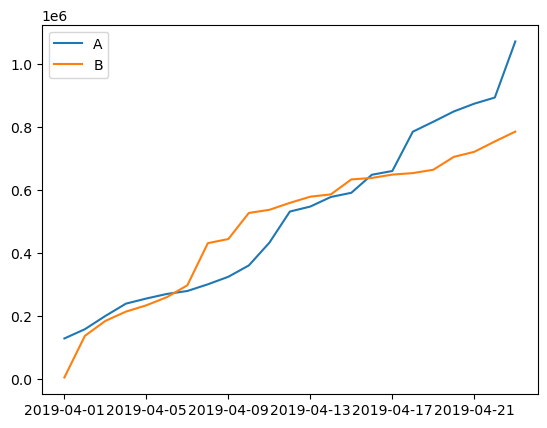

In [31]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'], 
         label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'], 
         label='B');

plt.legend();


Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем в следующем уроке.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

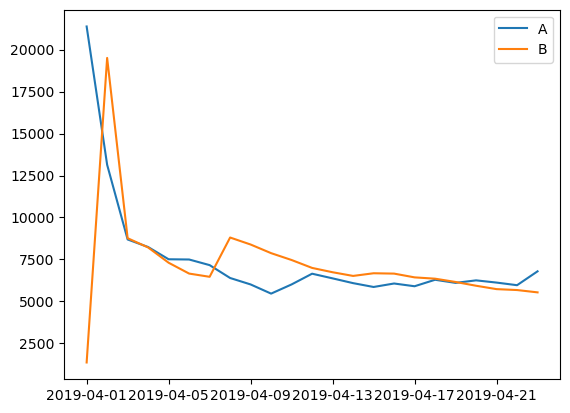

In [33]:
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='A');
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B');
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

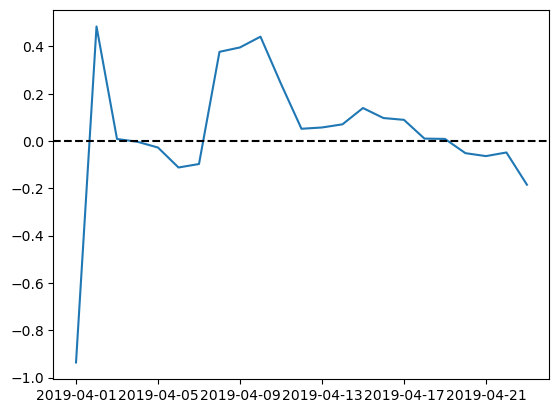

In [35]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(
        cumulativeRevenueB, 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['A', 'B'])
)

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
         (
  (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) /
  (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1
         )
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y —` ["2019-04-01", '2019-04-23', 0, 0.015]:`

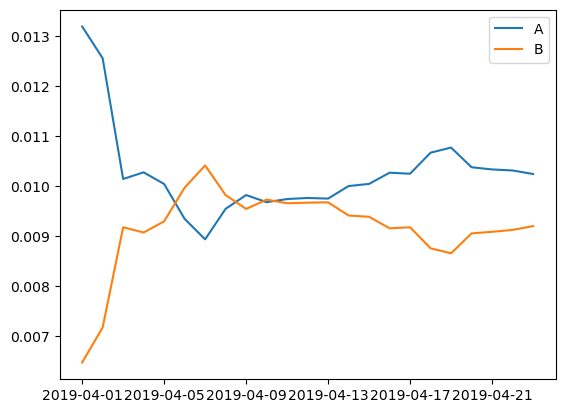

In [43]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
# plt.axis(['2019-04-01', '2019-04-23', 0, 0.015])

Симметричный график получился! Группы колебались около одного значения, но затем у группы A среднее количество заказов вырвалось вперёд и зафиксировалось, а у группы B — просело, но тоже зафиксировалось.

Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

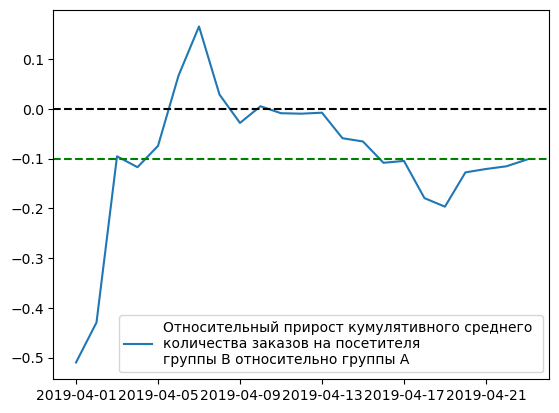

In [46]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].merge(
        cumulativeDataB[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['A', 'B'])
)

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост кумулятивного среднего \n\
количества заказов на посетителя \nгруппы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='green', linestyle='--')
# plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось, но теперь постепенно растёт.
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

# практика по теме:
## шаг 1.

Изучите данные из файлов с заказами и посетителями. 

Столбцы таблицы с заказами (orders): 
 - orderId — идентификатор заказа;
 - userId — идентификатор пользователя, совершившего заказ;
 - group — группа A/B-теста;
 - revenue — выручка заказа;
 - date — дата заказа.

Столбцы таблицы с посетителями (visitors): 
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество посетителей интернет-магазина в указанной группе A/B-теста в указанную дату.

Не удаляйте вывод первых пяти строк датафреймов и выполните задание по шагам: 
 - 1) Создайте датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавьтесь от дубликатов методом drop_duplicates().
 - 2) Объявите переменную ordersAggregated, содержащую:
 - дату;
 - группу A/B-теста;
 - число уникальных заказов в группе теста по указанную дату включительно;
 - число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
 - суммарную выручку заказов в группе теста по указанную дату включительно.
 - 3) Объявите переменную visitorsAggregated, содержащую:
 - дату;
 - группу A/B-теста;
 - количество уникальных посетителей в группе теста по указанную дату включительно.
 - 4) ordersAggregated и visitorsAggregated отсортируйте по столбцам 'date', 'group' в указанном порядке.
 - 5) Определите переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()
 - 6) Присвойте столбцам cumulativeData названия` ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']`
 - 7) Выведите первые 5 строк переменной cumulativeData

решение:


In [47]:
import pandas as pd
import datetime as dt
import numpy as np

orders = pd.read_csv(
    'https://code.s3.yandex.net/datasets/data_for_tasks_3.csv', 
    sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

visitors = pd.read_csv(
    'https://code.s3.yandex.net/datasets//data_for_tasks_3_visitors.csv', 
    sep=',')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

display(orders.head(5))
visitors.head(5)

,userId,group,orderId,revenue,date
0,1.815263e+19,B,4.612878e+15,489,2019-04-22
1,1.815263e+19,B,4.612878e+15,489,2019-04-22
2,1.794078e+19,B,4.136278e+18,97,2019-04-22
3,1.794078e+19,B,4.136278e+18,279,2019-04-22
4,2.461477e+18,B,1.406554e+19,4092,2019-04-22


,date,group,visitors
0,2019-03-11,A,321
1,2019-03-12,A,831
2,2019-03-13,A,700
3,2019-03-14,A,1222
4,2019-03-15,A,859


In [49]:
#1.датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. 
datesGroups = orders[['date', 'group']].drop_duplicates()

'''
#2.Объявите переменную ordersAggregated  - в ней счет результаты тестирования 
до выбранного дня включительно и сохраняли их в строках таблицы
получим строки таблицы orders, дата которых меньше 
или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups
Агрегируем значения. макс. дату. Для группы макс, и хотя 
 она будет определённой, сделаем это, чтобы 
столбец 'group' не пропал из итогового вывода. 
 Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
отсортируйте по столбцам 'date', 'group' в указанном порядке.
''' 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], 
        orders['group'] == x['group'])]
        .agg({'date' : 'max', 
             'group': 'max', 
             'orderId' : 'nunique', 
             'userId' : 'nunique', 
             'revenue' : 'sum'}), axis=1)
        .sort_values(by=['date', 'group'])
)
#3.Объявите переменную visitorsAggregated 4.отсортируйте по столбцам 'date', 
# 'group' в указанном порядке.

visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date': 'max', 
                 'group': 'max', 
                 'visitors': 'sum'}), axis=1)
           .sort_values(by=['date', 'group'])
)
 #5.Определите переменную cumulativeData, объединив ordersAggregated и 
# visitorsAggregated по колонкам 'date', 'group' методом merge()

cumulativeData = (
    ordersAggregated.merge(
        visitorsAggregated, 
        left_on=['date', 'group'], 
        right_on=['date', 'group'])
)

 #6 .Присвойте столбцам cumulativeData названия'date', 
# 'group', 'orders', 'buyers', 'revenue', 'visitors'

cumulativeData.columns = (
    ['date', 'group', 'orders', 
     'buyers', 'revenue', 'visitors']
)
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-03-11,A,10,10,110291,321
1,2019-03-11,B,9,9,36646,337
2,2019-03-12,A,35,33,343089,1152
3,2019-03-12,B,35,33,90491,1198
4,2019-03-13,A,59,56,1012663,1852


Вы собрали все нужные кумулятивные данные. Вперёд к построению графиков!
## шаг 2

Объявите переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраните данные о датах, выручке и числе заказов в группах A и B.

Постройте графики кумулятивной выручки по дням по группам.

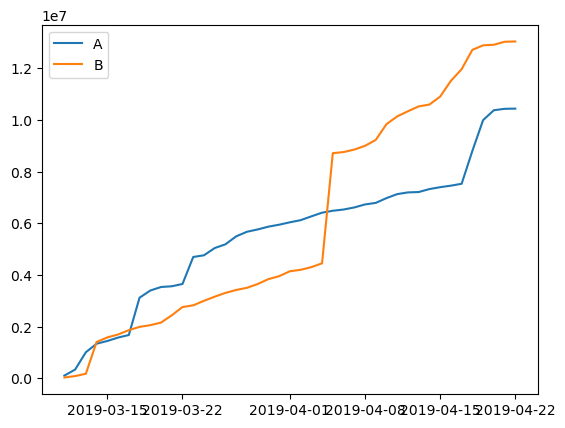

In [60]:
#Объявите переменные cumulativeRevenueA данные о датах, выручке и числе заказов в группах A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

#Объявите переменные cumulativeRevenueB, в которых сохраните данные о датах, выручке и числе заказов в группах B.
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

#Постройте графики кумулятивной выручки по дням по группам.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');

plt.legend();


В середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить.

## шаг 3
Для каждой группы постройте графики кумулятивного среднего чека по дням.

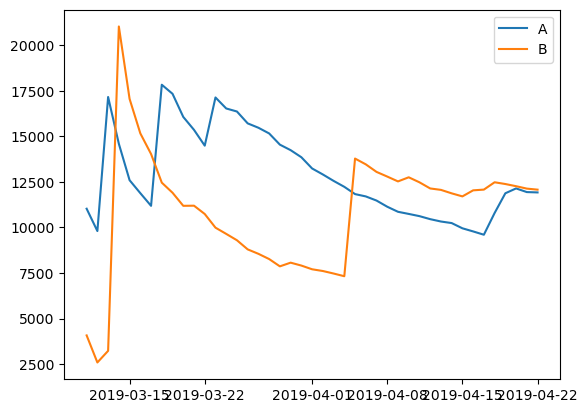

In [61]:
#Для каждой группы постройте графики кумулятивного среднего чека по дням.
plt.plot(
    cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
    label='A');

plt.plot(
    cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
    label='B');

plt.legend();

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.


## шаг 4

Объедините таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы:` ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. `Сохраните в переменной mergedCumulativeRevenue. 

Постройте график относительно различия кумулятивного среднего чека группы B к группе A. 
Добавьте пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

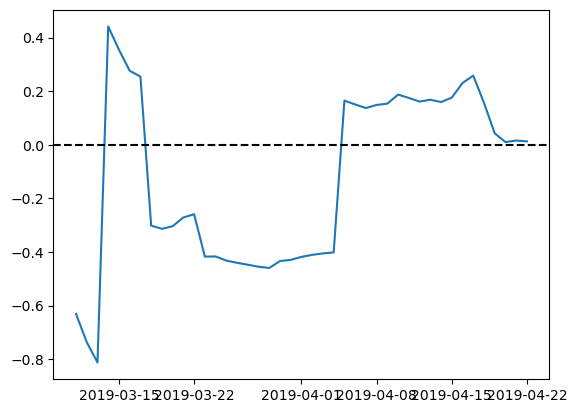

In [62]:
#Объедините таблицы . колонкам добавятся суффиксы А и В suffixes=['A', 'B']
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(
        cumulativeRevenueB, 
        left_on='date', 
        right_on='date', how='left', 
        suffixes=['A', 'B'])
)

#Постройте график относительно различия кумулятивного среднего чека группы B к группе A. 
#=строим отношения средних чеков=график относительного различия средних чеков.ср. 
# чек = выручку/количество а отношение разделим ср.чек на средний чек
plt.plot(
    mergedCumulativeRevenue['date'], 
    ((mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) 
     / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
);

#добавляем ось х
plt.axhline(y=0, color='black', linestyle='--');

Вы построили график относительного различия в среднем чеке между группами.
Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

## шаг 5

Добавьте в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
Объявите переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.
Постройте графики кумулятивного среднего количества заказов на посетителя по группам и по дням.

Задайте масштаб осей так: `plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), 0, 0.05]).`

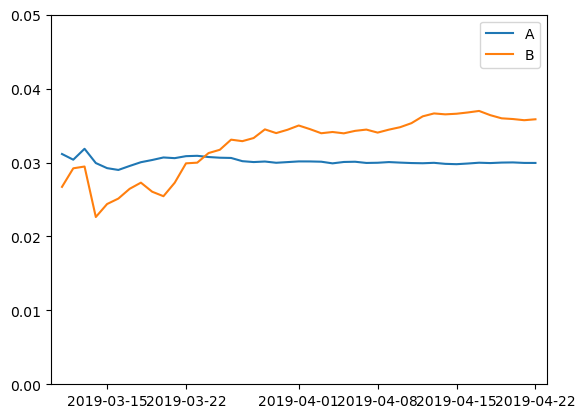

In [63]:
#считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
#отделяем данные по группе А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'] 
#отделяем данные по группе А
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
#Задайте масштаб осей так: 
plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), 0, 0.05]);
# выдает ошибку масштаб оси если задачать так. в примерах выше также можно скорректировать как тут
#plt.axis(["2019-03-10", '2019-04-23', 0, 0.015]) 


В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

Вы изменили масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 2% до 4%. В относительных величинах — это почти в 2 раза. Потому, если убрать масштаб осей, будет казаться, что колебания продолжаются, и среднее количество заказов по группам не установилось около своего среднего значения.

## шаг 6 
Объедините таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: `['date', 'conversionA', 'conversionB']`. Сохраните в переменной mergedCumulativeConversions. 
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
Добавьте пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.
Задайте масштаб осей так:`plt.axis(["2019-03-10", '2019-04-23', -0.5, 0.5]).`

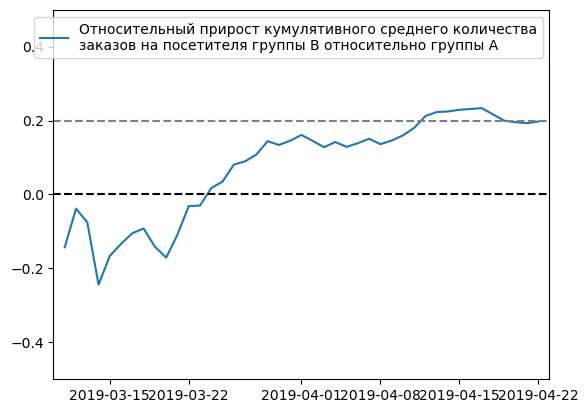

In [68]:
#Объедините таблицы cumulativeDataA и cumulativeDataB методом merge()
#чтобы построить график изменения кумулятивного среднего кол-ва заказов на посетителя группы В к группе А

mergedCumulativeConversions = (
    cumulativeDataA[['date', 'conversion']]
    .merge(cumulativeDataB[['date', 'conversion']], 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['A', 'B'])
)

plt.plot(mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1,
label='Относительный прирост кумулятивного среднего количества\n\
заказов на посетителя группы B относительно группы A' )
plt.legend();

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
#Задайте масштаб осей так
plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), -0.5, 0.5]);
#plt.axis(["2019-03-10", '2019-04-23', -0.5, 0.5])



Вы построили график относительного различия метрики между группами.
Почти с самого начала теста группа B лидирует по метрике: становится лучше и лучше, либо зафиксировалась около прироста в 20% относительно группы A.

## шаг 7
Посчитайте 90-й, 95-й и 99-й выборочные перцентили выручки с заказов по пользователям методом np.percentile(). Результат выведите на экран.

In [71]:
import pandas as pd
import numpy as np
import datetime as dt

data = pd.read_csv('https://code.s3.yandex.net/datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

display(data.head(10))
np.percentile(data['revenue'], [90, 95,99])

,userId,group,orderId,revenue,date
0,1.815263e+19,B,4.612878e+15,489,2019-04-22
1,1.815263e+19,B,4.612878e+15,489,2019-04-22
2,1.794078e+19,B,4.136278e+18,97,2019-04-22
3,1.794078e+19,B,4.136278e+18,279,2019-04-22
4,2.461477e+18,B,1.406554e+19,4092,2019-04-22
5,1.419853e+19,A,5.370143e+18,139,2019-04-22
6,1.419853e+19,A,5.370143e+18,370,2019-04-22
7,1.419853e+19,A,5.370143e+18,1732,2019-04-22
8,1.419853e+19,A,5.370143e+18,174,2019-04-22
9,1.419853e+19,A,5.370143e+18,399,2019-04-22


array([ 3899. ,  7740. , 43569.9])

Не более, чем у 5% заказов чек дороже 7 740 рублей. И не больше, чем у 1% заказов — дороже 43 570 рублей. 

Красиво жить не запретишь. По крайней мере, одному проценту пользователей.

## Долгожданные выводы из A/B-теста
Вот результаты решённых в этом курсе задач в сборе:
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.

График различия конверсии между группами (шаг 6) сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

График различия среднего чека (см шаг 4) колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из фактов выше, что следует делать с тестом?

**Остановить тест, признать его успешным и перейти к проверке следующей гипотезы.**

Именно. Поздравляем! Вы завершили свой первый анализ A/B-теста. И он был успешным! 